Code for Que number 1

‘Most of the popular authors prefer to write in the English language’ -find whether the statement is True or False.

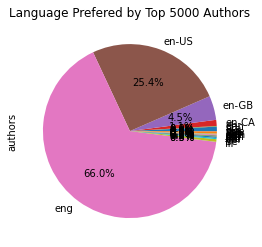

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('books.csv')

# finding popular authors as there are more than 1 book written by same author we use mean rating and groupby
rating=df.groupby(['authors', 'language_code'])['ratings_count'].mean()
result=pd.DataFrame({'rating_mean_allbooks': rating})

# we get now popular(readed by maximum people) authors according to higest rating counts
top=result.sort_values(by='rating_mean_allbooks', ascending=False).head(5000)

# counting languages of these top authors
top_lang = top.reset_index()[['authors', 'language_code']]
lang_counts = top_lang.groupby('language_code')['authors'].count()

# create a pie plot of the language counts
lang_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Language Prefered by Top 5000 Authors')
plt.show()

Code for Que number 2

Check Which language is the most extensively used and widely accepted language for book writing?

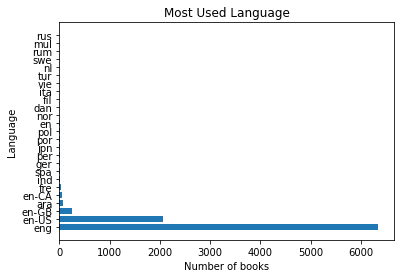

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('books.csv')

# counting the number of times each language appears
lang_counts = df['language_code'].value_counts()

# ploting graph between Most Used Language and Number of books
plt.barh(lang_counts.index, lang_counts.values)
plt.title('Most Used Language')
plt.xlabel('Number of books')
plt.ylabel('Language')
plt.show()

Code for Que number 3

Determine the user group that is or is not Fascinated for reading books. Find the overall rating each user has given a book?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('ratings.csv')

# we need to count books all books the user has read
books_count=df.groupby('user_id')['book_id'].count()

# calculating mean rating given by uses
mean_ratings_of_users=df.groupby('user_id')['rating'].mean()

# we need a new data frame for analaysing it
newdf = pd.DataFrame({'book_counts': books_count,'mean_ratings': mean_ratings_of_users})

print(newdf.sort_values(by='book_counts', ascending=False))

         book_counts  mean_ratings
user_id                           
30944            200      4.210000
12874            200      3.450000
52036            199      3.442211
12381            199      3.427136
28158            199      3.939698
...              ...           ...
32128             21      4.000000
40753             21      3.428571
51725             21      3.523810
43675             20      4.150000
34590             19      4.473684

[53424 rows x 2 columns]


Code for Que number 4

Locate people who had given books an overall rating of 0-1, 1-2, 2-3, 3-4, or 4-5 in question number 3. Also, the number of users with ratings that fall within 0-1, 1-2, 3-4, and 4-5.

In [ ]:
# b part
rating_01=newdf[(newdf['mean_ratings']>=0) & (newdf['mean_ratings']<=1)]
rating_12=newdf[(newdf['mean_ratings']>=1) & (newdf['mean_ratings']<=2)]
rating_23=newdf[(newdf['mean_ratings']>=2) & (newdf['mean_ratings']<=3)]
rating_34=newdf[(newdf['mean_ratings']>=3) & (newdf['mean_ratings']<=4)]
rating_45=newdf[(newdf['mean_ratings']>=4) & (newdf['mean_ratings']<=5)]

print(f'{rating_01}\n{rating_12}\n{rating_23}\n{rating_34}\n{rating_45}')

# for table
# print(f'{rating_01.head(3)}\n{rating_12.head(3)}\n{rating_23.head(3)}\n{rating_34.head(3)}\n{rating_45.head(3)}')

         book_counts  mean_ratings
user_id                           
47953             65           1.0
48515             94           1.0
49679             63           1.0
         book_counts  mean_ratings
user_id                           
3                 91      1.736264
7871              98      1.765306
11793             92      1.717391
         book_counts  mean_ratings
user_id                           
53                49      2.816327
68                51      2.980392
80                64      2.656250
         book_counts  mean_ratings
user_id                           
1                117      3.589744
4                134      3.768657
7                155      3.819355
         book_counts  mean_ratings
user_id                           
2                 65      4.415385
5                100      4.040000
6                 90      4.322222


Code for Que number 5

Determining relation of user average ratings and best book rankings of a particular book? Find whether rating on the main criteria for book ranking.

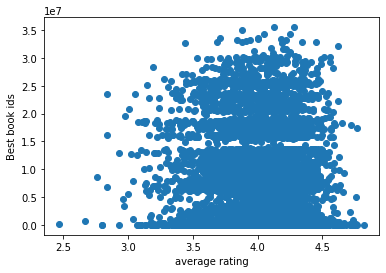

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('books.csv')

# ploting graph between ranking and average rating
plt.scatter(df['average_rating'], df['best_book_id'])
# plt.figure(figsize=(10,10))
plt.xlabel('average rating')
plt.ylabel('Best book ids')
plt.show()